In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Model

In [9]:
model = tf.keras.models.load_model('trained_model.keras')

2024-03-29 08:55:01.186478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 08:55:01.245329: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 08:55:01.245392: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 08:55:01.248060: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-29 08:55:01.248123: I external/local_xla/xla/stream_executor

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

## Visualizing SIngle Image of Test Set

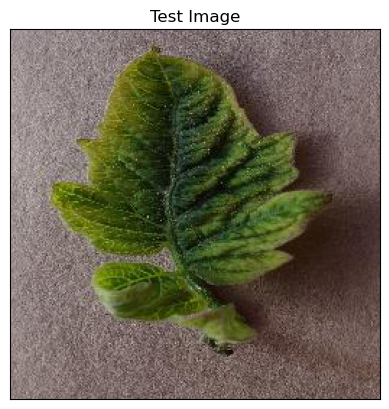

In [44]:
import cv2 # simple image preprocessing

image_path = "test/test/TomatoYellowCurlVirus1.JPG"
# Reading image
img = cv2.imread(image_path)

# converts from bgr into rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])

# initially in bgr format
plt.show()

## Testing Model

In [45]:
# convert to array
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)

# converts single image into batch
input_arr = np.array([input_arr]) 


print(input_arr.shape)

(1, 128, 128, 3)


In [46]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(array([[3.5271461e-17, 6.5379011e-16, 5.1972009e-16, 3.7794359e-14,
         6.0273437e-15, 8.6583139e-14, 2.4574736e-18, 6.4070943e-16,
         7.0978150e-19, 1.8364478e-16, 1.9924917e-19, 9.8978739e-15,
         8.1942168e-13, 2.3818339e-10, 7.2289775e-19, 7.3188314e-13,
         1.7722976e-15, 4.9536207e-18, 9.7297296e-08, 3.6556570e-15,
         7.2386112e-18, 9.9579919e-12, 2.2979169e-14, 3.0279484e-11,
         2.4254949e-15, 1.4012077e-13, 2.7857830e-10, 4.8149201e-16,
         2.8179875e-13, 6.4482018e-12, 7.2330407e-13, 1.7948410e-12,
         1.6554438e-13, 6.3546658e-08, 1.1768284e-14, 9.9999976e-01,
         2.1667089e-13, 4.5817418e-15]], dtype=float32),
 (1, 38))

In [47]:
result_index = np.argmax(prediction)
result_index

35

In [48]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

([], [])

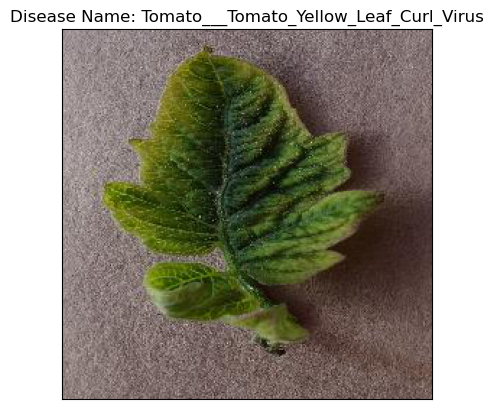

In [49]:
# Displaying Result of Disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])

## Part 8 - Summary

- Imported required libraries for test file
- Loaded keras file that contains the trained model
- Used cv2 and numpy for preprocessing and visualization of test image
<br><br>
- Resizing of image using `tf.keras.preprocessing.load_image(imafe_path, target_size=(128, 128))`
- Convert image to array using `tf.keras.preprocessing.img_to_array()`
- Convert single image to batch because at the time of training, we are using batch to train our model
    - At the time of prediction, we feed in batch format
- Performed model prediction; returning the probability of each class, returns index of the class
- Added labels as a list, then display together with image

##

## Part 9
- Import Streamlit
- Created streamlit function to import keras file
- Created sidebar 
- Created content per each page by adding sidebar select box
- Added buttons in detection page for upload and predict
- Added success method
